#### Creating a toy to test my understanding of gaussian fitting
I think its fine...but lets make a quick toy

In [24]:
import sys,os,os.path

sys.path.append("../../")   # cite IC from parent directory
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'
from    IC.invisible_cities.core.core_functions   import shift_to_bin_centers

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
from scipy.optimize import curve_fit

In [37]:
# generate normalised data
data = np.random.normal(loc = 1.6, scale = 0.00452, size = 1000)

0.001727611189497047


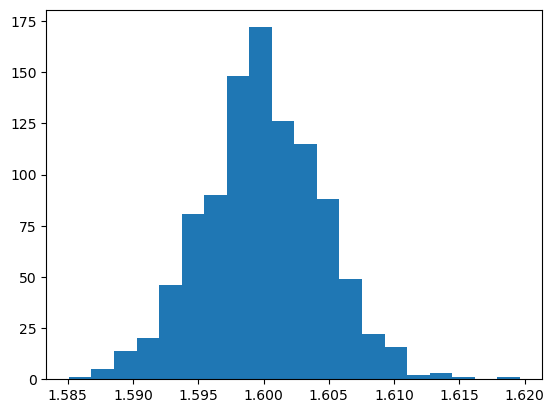

In [56]:
# plot histogram
hist, edges, patches = plt.hist(data, bins = 20)
# edge distances
bin_width = (edges[1] - edges[0])
print(bin_width)
# convert edges to centres
centres = shift_to_bin_centers(edges)
#plt.scatter(centres, hist, color='red', s = 20)
plt.show()

In [57]:
# fit as we do
def gauss(x, a, mu, sigma):
    numer = np.square(x - mu)
    denom = 2*np.square(sigma)

    return a*np.exp(-numer/denom)    

p0 = [175, 1.6, 0.004]

popt, pcov = curve_fit(gauss, centres, hist, p0, maxfev = 500000)

In [59]:
ns0 = quad(gauss, 1.5, 1.7, args = (popt[0], popt[1], popt[2]))
print(ns0)
print(ns0[0]/bin_width)

(1.71391619371742, 1.6807533965729898e-08)
992.0728715680443


In [43]:
# plot parameters for fit, similar to plot_hist
def plot_fit(function, x, popt, colour = 'red', x_counts = 100000, lgnd = 'Fit', popt_text = True):
    '''
    plots a fit based on individual points and a function
    plots across a more continuous space, to reduce weird artifacting for low X numbers
    '''

    # take much more continuous x axis
    x_min = np.min(x)
    x_max = np.max(x)

    x_plot = np.linspace(x_min, x_max, num = x_counts, endpoint = True)

    
    y = function(x_plot, *popt)
    plt.plot(x_plot, y, label = lgnd, color = colour)
    return


(1.5, 1.7)

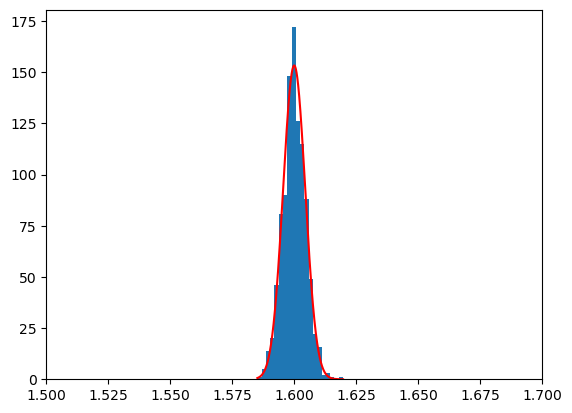

In [50]:
plot_fit(gauss, [np.min(data), np.max(data)], popt)
plt.hist(data, bins = 20)
plt.xlim([1.5, 1.7])

#### So that does fit it perfectly, but I need to include some 1/sqrt(2pi) factor in it seems to make it work properly.